# Tutorial
Basic tutorial covering 1-D, 2-D and 3-D transforms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5  # data input for this demonstration
import time

from numpy.fft import fftshift
from tqdm import tqdm # for progress bars
from statistics import mean, stdev

import torch
import frft
import frft_gpu as frft_g

In [2]:
%matplotlib notebook

In [3]:
data = h5.File( 'data.hdf5', 'r' )
data.visit( print ) # prints entire data tree

1d
1d/amp
1d/phase
2d
2d/amp
2d/phase
3d
3d/amp
3d/phase


In [4]:
nSnapshots = 11
alpha = np.linspace( 0., 2., nSnapshots )

## 1-D FRFT

In [5]:
amp, phs = tuple( data[ '1d/%s'%st ][:] for st in [ 'amp', 'phase' ] )
obj_1d = amp * np.exp( 1.j * phs ) # complex-valued object
obj_1d_shifted = fftshift( obj_1d )
obj_1d_shifted_gpu = torch.from_numpy( obj_1d_shifted ).cuda()

In [6]:
results = []
cputime = []
gputime = []
for al in tqdm( alpha, total=alpha.size ):
    start = time.time()
    fobj_1d = frft.frft( obj_1d_shifted, al )
    t_cpu = time.time() - start
    results.append( fftshift( fobj_1d ) )
    cputime.append( t_cpu*1.e6 )
    
    start = time.time()
    fobj_1d = frft_g.frft( obj_1d_shifted_gpu, al )
    t_gpu = time.time() - start
    gputime.append( t_gpu*1.e6 )

print( 'Mean CPU time = %f μs'%mean( cputime ) )
print( 'Mean GPU time = %f μs'%mean( gputime ) )

  0%|          | 0/11 [00:00<?, ?it/s][W 220524 11:04:31 frft:40] Recalculating chirp. 
[W 220524 11:04:31 frft_gpu:52] Recalculating chirp. 
100%|██████████| 11/11 [00:00<00:00, 1131.93it/s]

Mean CPU time = 485.593622 μs
Mean GPU time = 358.711589 μs


<IPython.core.display.Javascript object>


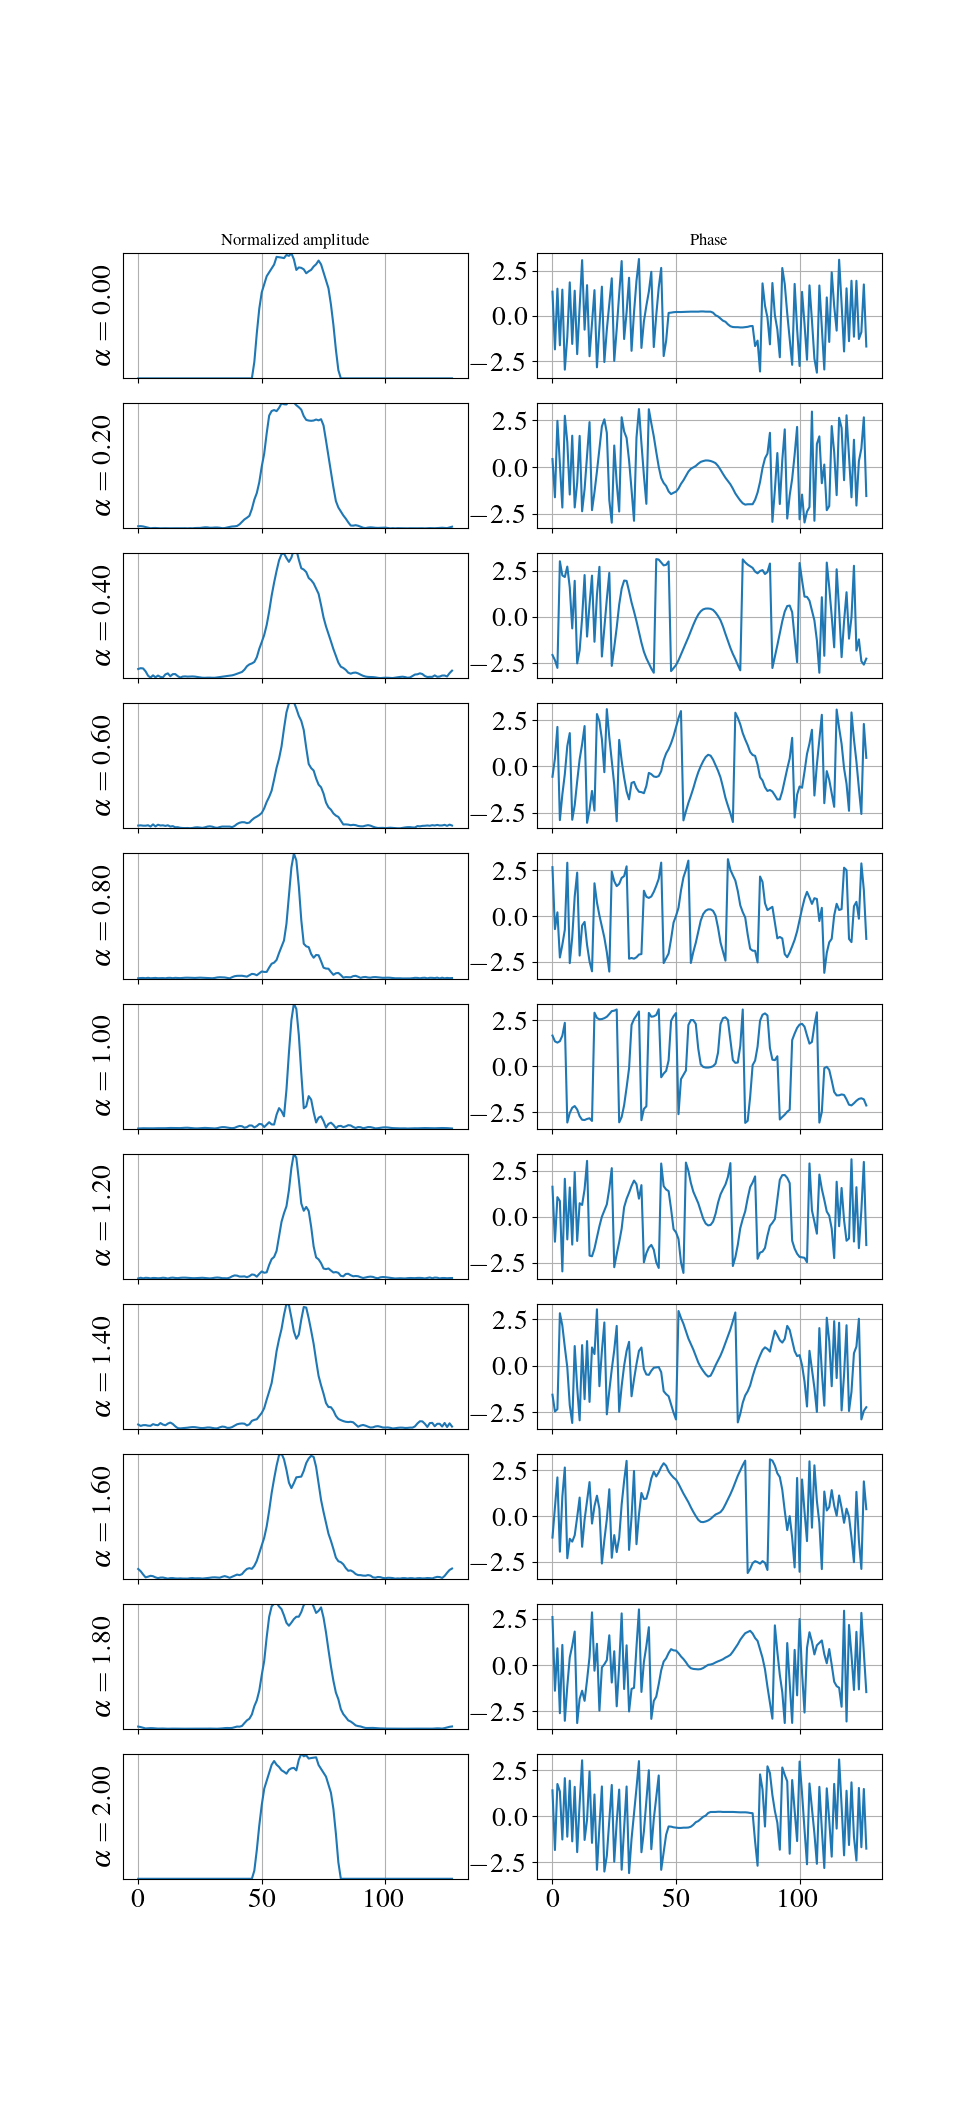

Text(0.5, 1.0, 'Phase')

In [7]:
fig, ax = plt.subplots( nSnapshots, 2, sharex=True )
for n in range( nSnapshots ):
    ax[n,0].plot( np.absolute( results[n] )/np.absolute( results[n].max() ) )
    ax[n,0].grid() 
    ax[n,0].set_ylim( [ 0., 1. ] )
    ax[n,0].set_yticks( [] )
    ax[n,0].set_ylabel( r'$\alpha = %.2f$'%alpha[n] )
    
    ax[n,1].plot( np.angle( results[n] ) )
    ax[n,1].grid()

ax[0,0].set_title( 'Normalized amplitude' )
ax[0,1].set_title( 'Phase')

## 2-D FRFT

In [8]:
amp, phs = tuple( data[ '2d/%s'%st ][:] for st in [ 'amp', 'phase' ] )
obj_2d = amp * np.exp( 1.j * phs ) # complex-valued object
obj_2d_shifted = fftshift( obj_2d )
obj_2d_shifted_gpu = torch.from_numpy( obj_2d_shifted ).cuda()

In [9]:
results = []
cputime = []
gputime = []
for al in tqdm( alpha, total=alpha.size ):
    start = time.time()
    fobj_1d = frft.frft( obj_2d_shifted, al )
    t_cpu = time.time() - start
    results.append( fftshift( fobj_1d ) )
    cputime.append( t_cpu*1.e6 )
    
    start = time.time()
    fobj_1d = frft_g.frft( obj_2d_shifted_gpu, al )
    t_gpu = time.time() - start
    gputime.append( t_gpu*1.e6 )

print( 'Mean CPU time = %f μs'%mean( cputime ) )
print( 'Mean GPU time = %f μs'%mean( gputime ) )

  0%|          | 0/11 [00:00<?, ?it/s][W 220524 11:04:31 frft:40] Recalculating chirp. 
[W 220524 11:04:31 frft_gpu:52] Recalculating chirp. 
100%|██████████| 11/11 [00:00<00:00, 366.47it/s]

Mean CPU time = 2128.275958 μs
Mean GPU time = 525.322827 μs


<IPython.core.display.Javascript object>


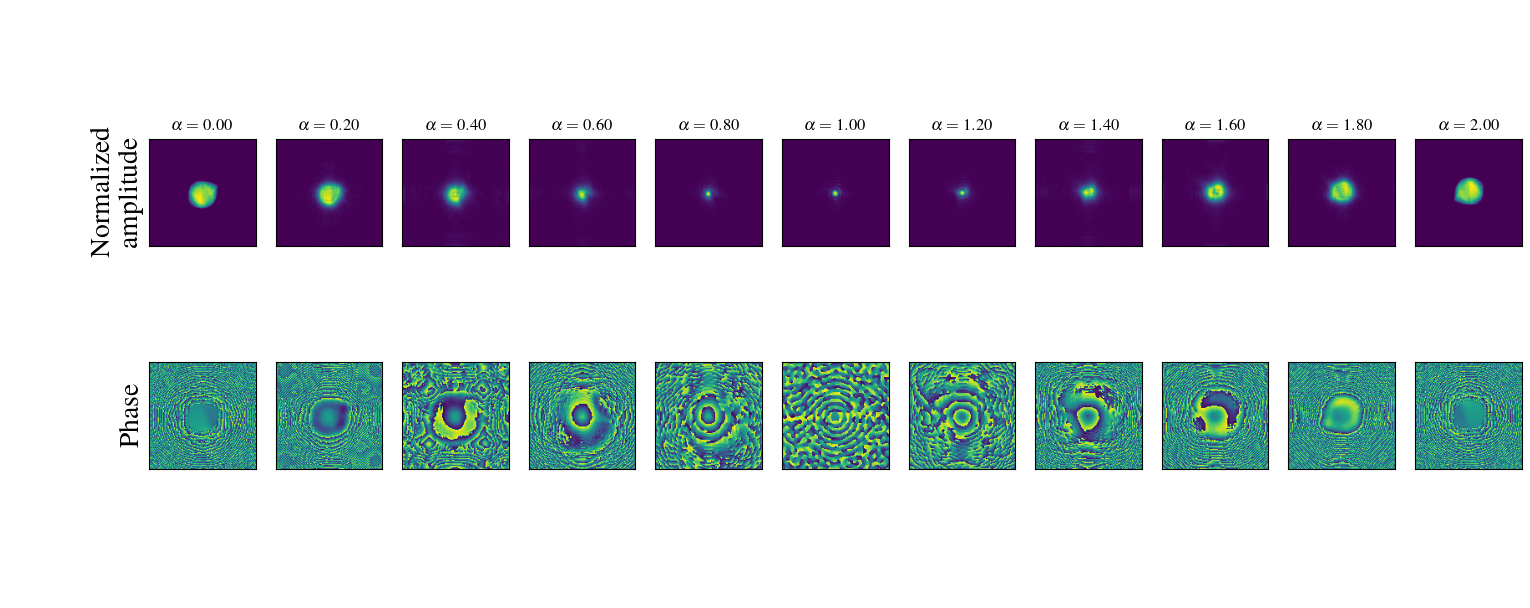

In [10]:
fig, ax = plt.subplots( 2, nSnapshots )
for n in range( nSnapshots ):
    ax[0,n].imshow( np.absolute( results[n] )/np.absolute( results[n].max() ) )
    ax[0,n].set_xticks( [] )
    ax[0,n].set_yticks( [] )
    ax[0,n].set_title( r'$\alpha = %.2f$'%alpha[n] )
    
    ax[1,n].imshow( np.angle( results[n] ) )
    ax[1,n].set_xticks( [] )
    ax[1,n].set_yticks( [] )


ax[0,0].set_ylabel( 'Normalized\namplitude' )
ax[1,0].set_ylabel( 'Phase')

fig.tight_layout( pad=0.25, h_pad=0.25 )

## 3D FRFT

In [11]:
amp, phs = tuple( data[ '3d/%s'%st ][:] for st in [ 'amp', 'phase' ] )
obj_3d = amp * np.exp( 1.j * phs ) # complex-valued object
obj_3d_shifted = fftshift( obj_3d )
obj_3d_shifted_gpu = torch.from_numpy( obj_3d_shifted ).cuda()

In [12]:
results = []
cputime = []
gputime = []
for al in tqdm( alpha, total=alpha.size ):
    start = time.time()
    fobj_1d = frft.frft( obj_3d_shifted, al )
    t_cpu = time.time() - start
    results.append( fftshift( fobj_1d ) )
    cputime.append( t_cpu*1.e6 )
    
    start = time.time()
    fobj_1d = frft_g.frft( obj_3d_shifted_gpu, al )
    t_gpu = time.time() - start
    gputime.append( t_gpu*1.e6 )

print( 'Mean CPU time = %f μs'%mean( cputime ) )
print( 'Mean GPU time = %f μs'%mean( gputime ) )

  0%|          | 0/11 [00:00<?, ?it/s][W 220524 11:04:34 frft:40] Recalculating chirp. 
[W 220524 11:04:35 frft_gpu:52] Recalculating chirp. 
100%|██████████| 11/11 [00:07<00:00,  1.44it/s]

Mean CPU time = 677276.524630 μs
Mean GPU time = 6926.753304 μs


In [13]:
data.close()

## Conclusions
Note the time taken for the calculation of 1-D, 2-D and 3-D FRFTs (sizes $128$, $128^2$ and $128^3$ pixels respectively). 

| Data type | Size( pixels) | FrFT run time on CPU (μs) | FrFT run time on GPU (μs) |
|:----------:|:-----------:|:--------:|:-----:|
| 1D | $128$ | 485 | 358 |
| 2D | $128^2$ | 2128 | 525 |
| 3D | $128^3$ | 677276 | 6926 |